In [25]:
# Separando as variáveis independentes (X) e dependente (y)
X = data.drop(columns=['Depression', 'id'])  # Removendo a variável-alvo e a coluna de ID
y = data['Depression']

# Verificando as dimensões das variáveis
dimensoes_X = X.shape
dimensoes_y = y.shape

dimensoes_X, dimensoes_y

((27901, 109), (27901,))

In [26]:
# Dividindo os dados em treino e teste (70% treino, 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificando as dimensões dos conjuntos
dimensoes_treino = X_treino.shape, y_treino.shape
dimensoes_teste = X_teste.shape, y_teste.shape

dimensoes_treino, dimensoes_teste

(((19530, 109), (19530,)), ((8371, 109), (8371,)))

In [27]:
# Identificando variáveis numéricas contínuas
variaveis_numericas = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                       'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Aplicando padronização (StandardScaler) apenas às variáveis contínuas
scaler = StandardScaler()
X_treino[variaveis_numericas] = scaler.fit_transform(X_treino[variaveis_numericas])
X_teste[variaveis_numericas] = scaler.transform(X_teste[variaveis_numericas])

# Verificando as primeiras linhas após a padronização
X_treino.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer
3897,0,0.033877,0.620700,-0.007156,0.257220,-1.426588,-0.013494,1,0.766131,-0.790985,...,False,False,False,False,False,False,False,True,False,False
4787,0,-0.374151,-0.104707,-0.007156,1.510608,-0.691753,-0.013494,0,0.226863,-0.790985,...,False,False,False,False,False,False,False,True,False,False
9239,1,0.441905,-0.104707,-0.007156,0.570567,0.777916,-0.013494,1,0.766131,1.300694,...,False,False,False,False,False,False,False,True,False,False
10312,0,0.237891,1.346107,-0.007156,-1.309514,-1.426588,-0.013494,1,1.305400,0.603468,...,False,False,False,False,False,False,False,True,False,False
7711,1,-0.782179,1.346107,-0.007156,0.877102,1.512751,-0.013494,0,1.305400,1.300694,...,False,False,False,False,False,False,False,True,False,False


In [28]:
X_teste.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer
21885,0,0.849933,1.346107,-0.007156,-0.635137,1.512751,-0.013494,1,0.496497,-0.790985,...,False,False,False,False,False,False,False,True,False,False
17141,0,1.665989,-0.104707,-0.007156,-1.629673,0.777916,-0.013494,1,1.305400,-0.790985,...,False,False,False,False,False,False,False,True,False,False
9897,1,0.441905,0.620700,-0.007156,-1.636485,-0.691753,-0.013494,0,-0.851674,-0.790985,...,False,False,False,False,False,False,False,True,False,False
22337,1,-1.190207,-0.104707,-0.007156,-0.880365,-1.426588,-0.013494,1,0.496497,1.300694,...,False,False,False,False,False,False,False,True,False,False
26449,0,-0.782179,0.620700,-0.007156,-1.193712,-1.426588,-0.013494,0,-0.042771,-1.488212,...,False,False,False,False,False,False,False,True,False,False


In [29]:
# Inicializando o modelo Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Treinando o modelo com os dados de treino
random_forest.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [30]:
# Realizando previsões no conjunto de teste
y_pred = random_forest.predict(X_teste)

# Calculando métricas de desempenho
acuracia = accuracy_score(y_teste, y_pred)
precisao = precision_score(y_teste, y_pred)
recall = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)
relatorio_classificacao = classification_report(y_teste, y_pred, target_names=["Não", "Sim"])

In [31]:
precisao

0.8507113623075424

In [32]:
recall

0.8906345643746174

In [33]:
f1

0.8702153110047847

In [34]:
# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)

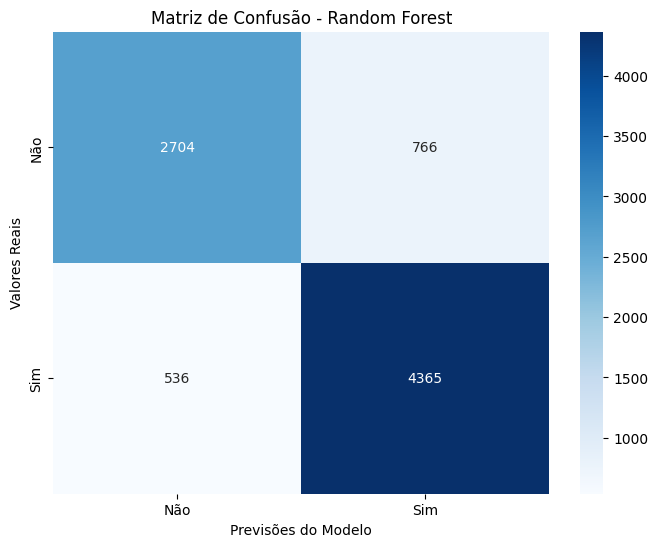

In [35]:
# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsões do Modelo")
plt.ylabel("Valores Reais")
plt.show()

In [36]:
print("\nRelatório de Classificação:")
print(relatorio_classificacao)

print("\nAcurácia:", acuracia)


Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.83      0.78      0.81      3470
         Sim       0.85      0.89      0.87      4901

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371


Acurácia: 0.8444630271174293


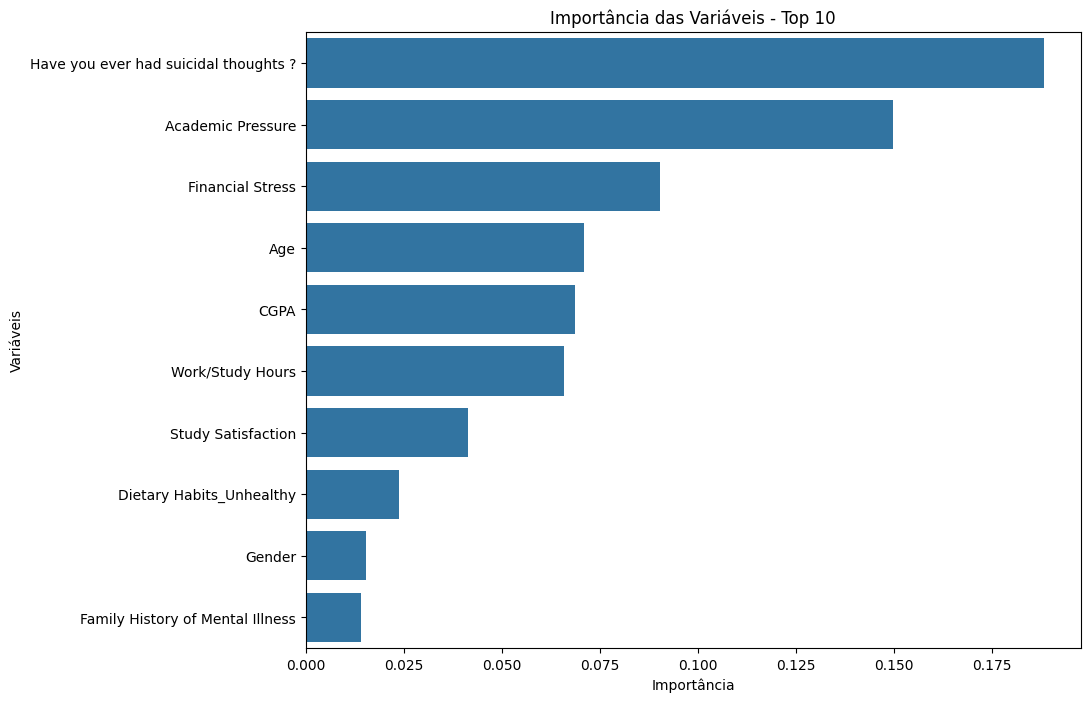

,Feature,Importance
7,Have you ever had suicidal thoughts ?,0.188239
2,Academic Pressure,0.149887
9,Financial Stress,0.090353
1,Age,0.070939
4,CGPA,0.068630
8,Work/Study Hours,0.065760
5,Study Satisfaction,0.041322
17,Dietary Habits_Unhealthy,0.023806
0,Gender,0.015371
10,Family History of Mental Illness,0.013999


In [37]:
# Analisando a importância das variáveis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotando as 10 variáveis mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Importância das Variáveis - Top 10')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

# Exibindo as 10 principais variáveis
feature_importances.head(10)

-----------------------------------------------------------------